<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/uas_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Collection**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

In [101]:
# Load dataset
file_path = "/content/drive/MyDrive/DM/salaries.csv"
df = pd.read_csv(file_path)

In [88]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


#**2. Pre Processing**

In [103]:
# Filter data sesuai kriteria
filtered_jobs = ['Data Scientist', 'Data Engineer', 'Data Analyst',
                 'Machine Learning Engineer', 'AI Engineer']
asean_countries = ['ID', 'TH', 'VN', 'SG', 'PH']
employment_types = ['FT', 'CT', 'PT', 'FL']

In [104]:
df = df[df['job_title'].isin(filtered_jobs)]
df = df[df['employee_residence'].isin(asean_countries)]
df = df[df['employment_type'].isin(employment_types)]

In [105]:
# Reset index
df = df.reset_index(drop=True)

In [106]:
# Ubah teks ke huruf kapital atau sesuai format
df['job_title'] = df['job_title'].str.title()
df['company_location'] = df['company_location'].str.upper()
df['employee_residence'] = df['employee_residence'].str.upper()

In [107]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


#**3. EDA**

###**3.1 Distribusi Gaji (USD)**

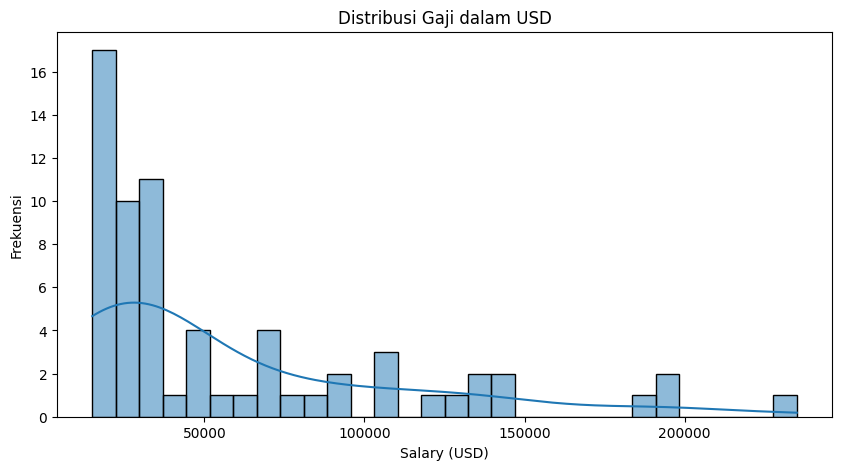

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title("Distribusi Gaji dalam USD")
plt.xlabel("Salary (USD)")
plt.ylabel("Frekuensi")
plt.show()

###**3.2 Top 10 Job Title berdasarkan Rata-rata Gaji**

/tmp/ipython-input-109-3349222486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_avg_salary.values, y=job_avg_salary.index, palette='viridis')


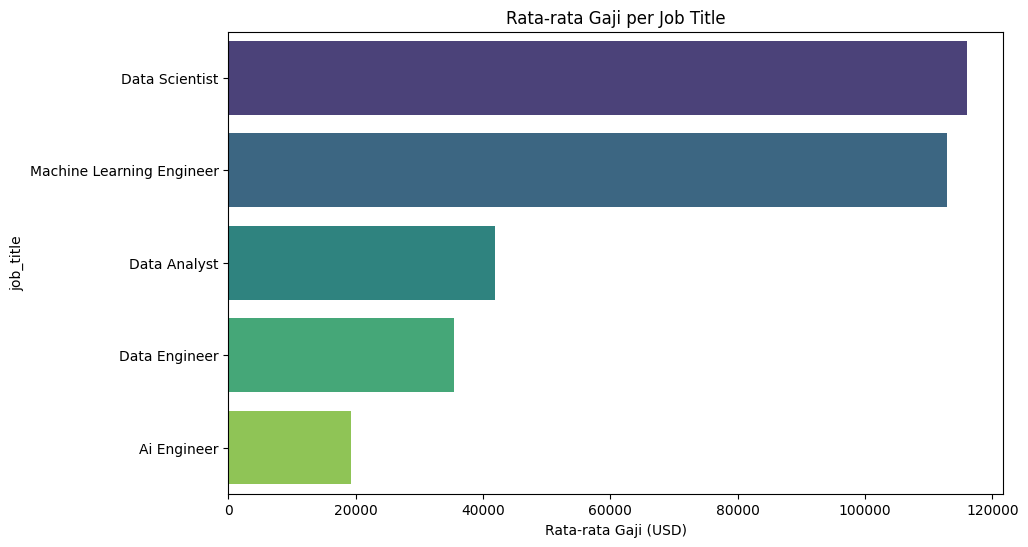

In [109]:
plt.figure(figsize=(10, 6))
job_avg_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=job_avg_salary.values, y=job_avg_salary.index, palette='viridis')
plt.title("Rata-rata Gaji per Job Title")
plt.xlabel("Rata-rata Gaji (USD)")
plt.show()

###**3.3 Tren Gaji dari Tahun ke Tahun**

/tmp/ipython-input-110-479943598.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='work_year', y='salary_in_usd', estimator='mean', ci=None, marker='o')


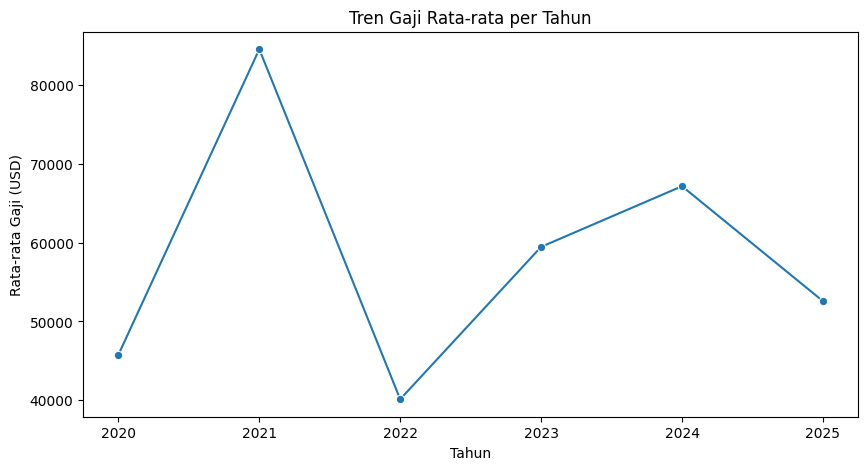

In [110]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', estimator='mean', ci=None, marker='o')
plt.title("Tren Gaji Rata-rata per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Gaji (USD)")
plt.show()

###**3.4 Analisis Job Title Tertentu (Top 5)**

/tmp/ipython-input-112-1044905134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_title', y='salary_in_usd', palette='Set2')


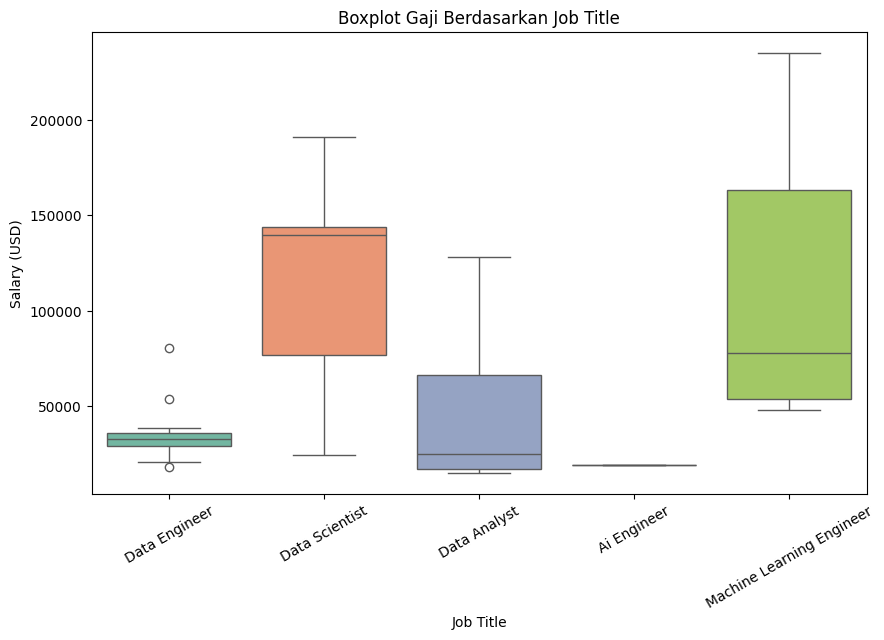

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_title', y='salary_in_usd', palette='Set2')
plt.title("Boxplot Gaji Berdasarkan Job Title")
plt.xlabel("Job Title")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=30)
plt.show()

#**4. Feature Engineering**

####**4.1 Mapping Negara menjadi Benua**

In [113]:
df['continent'] = 'Asia'  # Semua berasal dari ASEAN

####**4.2 Gaji Berdasarkan Quartal**

In [114]:
df['salary_quartile'] = pd.qcut(df['salary_in_usd'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

####**4.3 Hasil Feature Baru**

In [115]:
df[['job_title', 'employee_residence', 'continent', 'salary_in_usd', 'salary_quartile']].head()

,job_title,employee_residence,continent,salary_in_usd,salary_quartile
0,Data Engineer,PH,Asia,36000,Q3
1,Data Engineer,PH,Asia,30000,Q2
2,Data Engineer,PH,Asia,32742,Q2
3,Data Engineer,PH,Asia,28649,Q2
4,Data Engineer,TH,Asia,18000,Q1


#**5. Encode & Split**

####**5.1 Drop Kolom Redundan**

In [116]:
df_clean = df.drop(columns=['salary', 'salary_currency'])

####**5.2 Label Encoding Kolom Kategorikal**

In [125]:
from sklearn.preprocessing import LabelEncoder

# Salin dataframe yang sudah difilter sebelumnya
df_model = df.copy()

# Kolom kategorikal yang perlu di-encode
categorical_cols = ['company_location', 'employee_residence', 'experience_level',
                    'employment_type', 'job_title', 'company_size', 'salary_quartile']

# Encode kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

####**5.3 Split Feature & Label**

In [126]:
X = df_clean.drop(columns=['salary_in_usd'])
y = df_clean['salary_in_usd']

#**6. Model Training**

####**6.1 Inisialisasi dan Training Model**

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

####**6.2 Prediksi dan Evaluasi Model**

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 14153.412525510203
MSE: 863466848.1822218
R2 Score: 0.683395680146587


#**7. Visualisasi**

####**7.1 Visualisasi: Actual vs Predicted Salary**

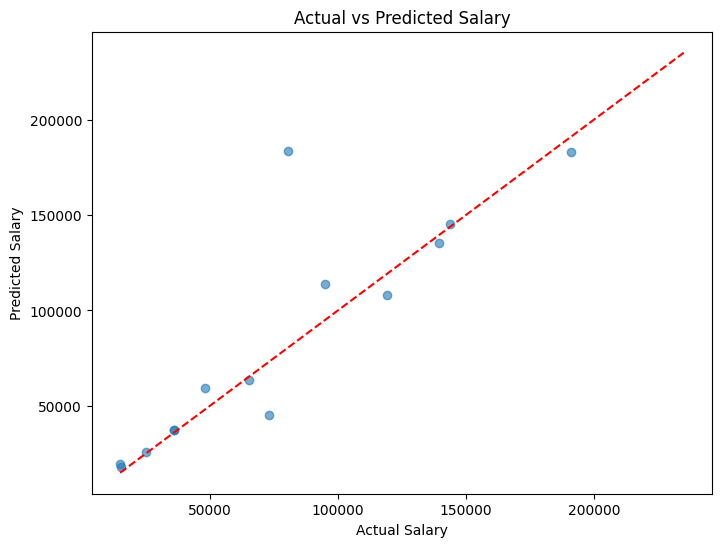

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

####**7.2 Feature Importance (Decision Tree)**

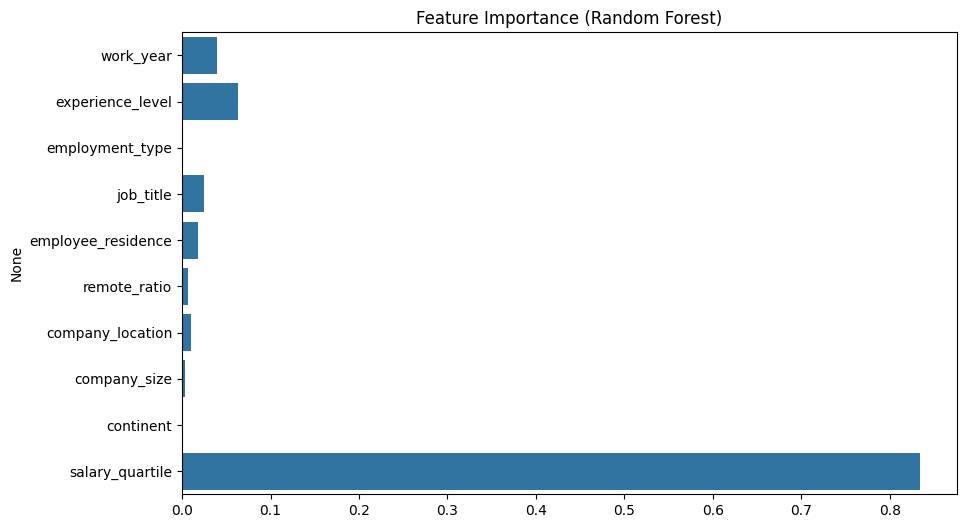

In [130]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

####**7.3 Visualisasi Gaji per Negara (Top 15)**

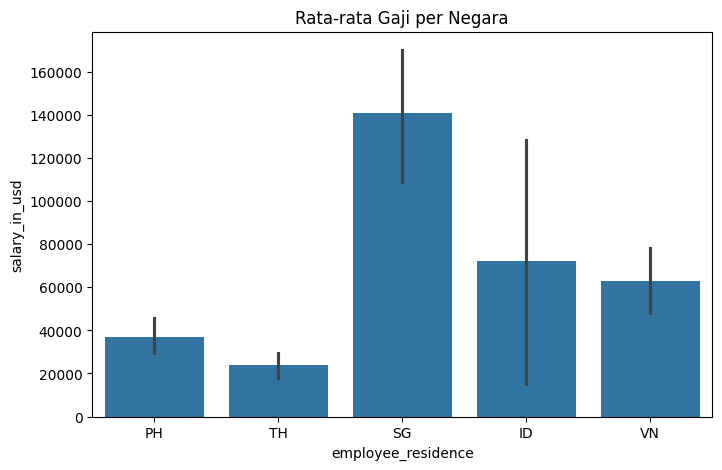

In [131]:
top_countries = df['employee_residence'].value_counts().index[:5]
plt.figure(figsize=(8, 5))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df[df['employee_residence'].isin(top_countries)], estimator=np.mean)
plt.title("Rata-rata Gaji per Negara")
plt.show()

####**7.4 Visualisasi Gaji per Job Title (Top 15)**

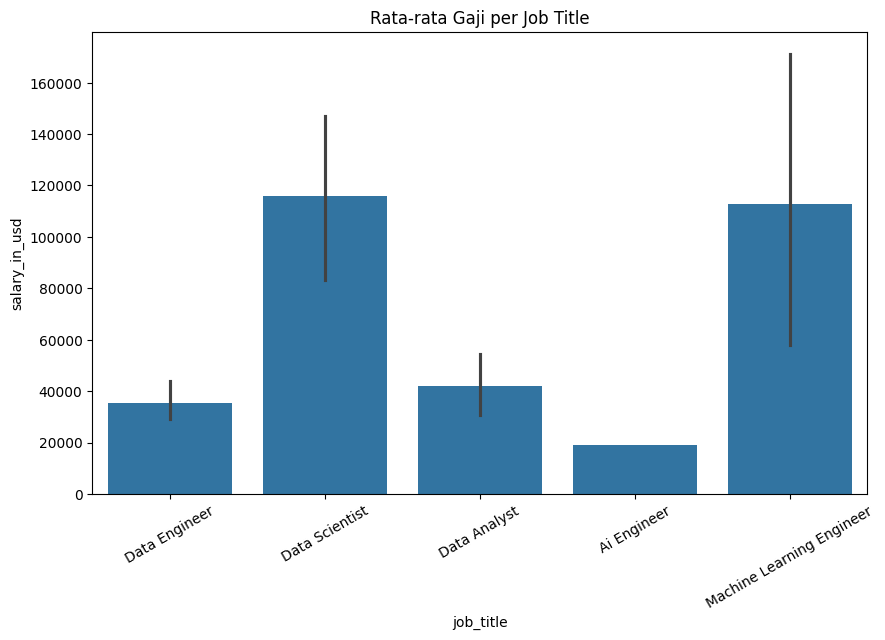

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, estimator=np.mean)
plt.title("Rata-rata Gaji per Job Title")
plt.xticks(rotation=30)
plt.show()

####**7.5 Distribusi Gaji Berdasarkan Remote Ratio**

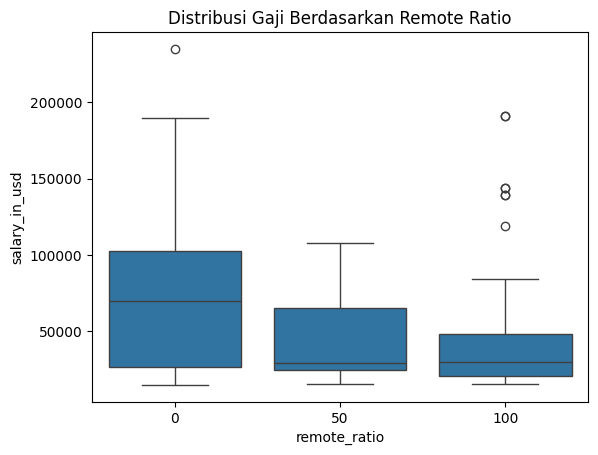

In [133]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Distribusi Gaji Berdasarkan Remote Ratio")
plt.show()

####**7.6 Rata-rata Gaji per Tahun (Lineplot)**

/tmp/ipython-input-134-1154150791.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='mean', ci=None, marker='o')


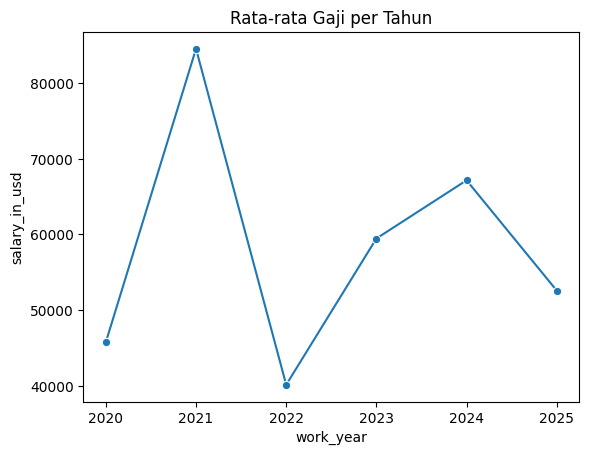

In [134]:
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='mean', ci=None, marker='o')
plt.title("Rata-rata Gaji per Tahun")
plt.show()